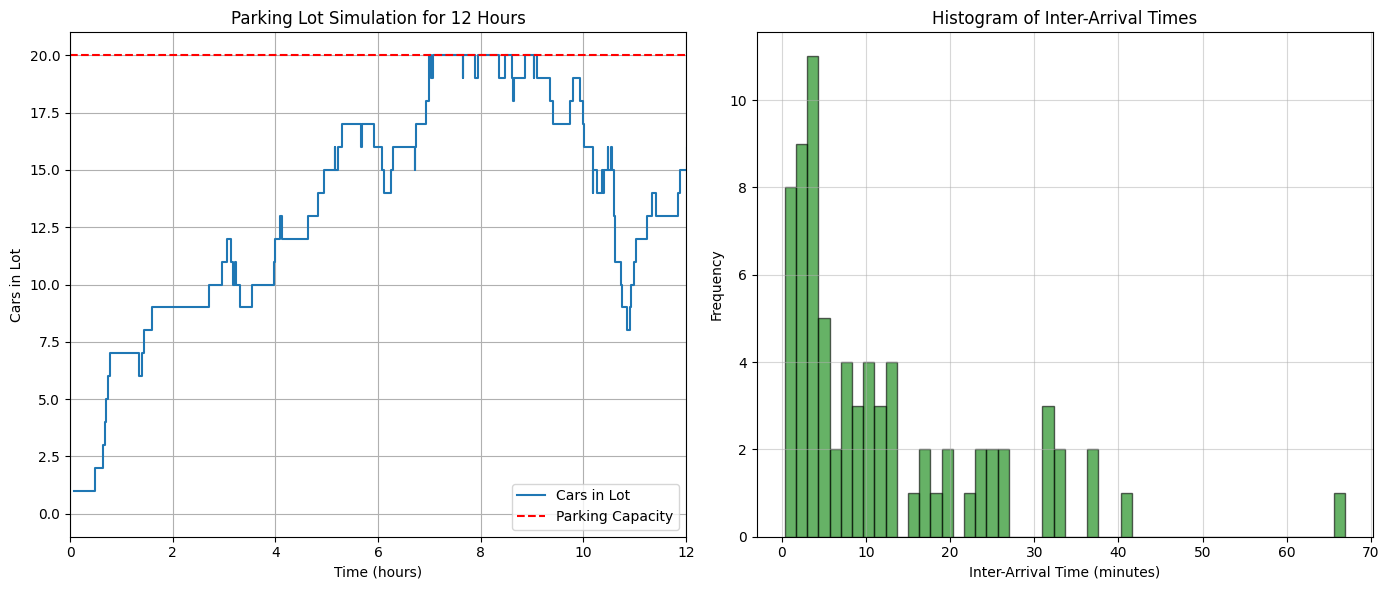

Total cars arrived: 75
Total cars lost due to full capacity: 5


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
arrival_rate = 5  # average cars arriving per hour
time_duration = 12 * 3600  # simulation time in seconds (12 hours)
average_parking_duration = 5 * 3600  # average parking duration in seconds (5 hours)
parking_capacity = 20  # total parking spots in the lot

# Function to generate Poisson events (arrivals)
def generate_poisson_events(rate, time_duration):
    num_events = np.random.poisson(rate * (time_duration / 3600))  # Total arrivals
    inter_arrival_times = np.random.exponential(3600 / rate, num_events)  # Times between arrivals
    event_times = np.cumsum(inter_arrival_times)  # Cumulative sum to get event times
    return num_events, event_times, inter_arrival_times

# Simulate car arrivals
num_events, arrival_times, inter_arrival_times = generate_poisson_events(arrival_rate, time_duration)

# Simulate parking durations and calculate departure times
parking_durations = np.random.exponential(average_parking_duration, num_events)  # Time cars stay
departure_times = arrival_times + parking_durations  # Calculate when each car leaves

# Create a list of all events (arrivals and departures)
event_log = [(time, 1) for time in arrival_times] + [(time, -1) for time in departure_times]
event_log.sort(key=lambda x: x[0])  # Sort events by time

# Track occupancy and lost customers
current_occupancy = 0
lost_customers = 0
occupancy_log = []

# Process each event in the log to update occupancy
for event_time, change in event_log:
    if change == 1:  # Arrival
        if current_occupancy < parking_capacity:
            current_occupancy += 1  # Car parks
        else:
            lost_customers += 1  # Car turned away due to full capacity
    elif change == -1:  # Departure
        if current_occupancy > 0:  # Check if there are cars to depart
            current_occupancy -= 1  # Car leaves
    occupancy_log.append((event_time, current_occupancy))

# Extract times and occupancies for plotting
times, occupancies = zip(*occupancy_log)

# Convert times from seconds to hours and inter-arrival times to minutes
times_hours = np.array(times) / 3600
inter_arrival_times_minutes = np.array(inter_arrival_times) / 60

# Visualization of parking lot occupancy and inter-arrival times
plt.figure(figsize=(14, 6))

# Plotting the occupancy over time
plt.subplot(1, 2, 1)
plt.step(times_hours, occupancies, where='post', label='Cars in Lot')
plt.axhline(parking_capacity, color='r', linestyle='--', label='Parking Capacity')
plt.xlabel('Time (hours)')
plt.ylabel('Cars in Lot')
plt.title('Parking Lot Simulation for 12 Hours')
plt.xlim(0, 12)  # Ensure x-axis is limited to 12 hours
plt.legend()
plt.grid(True)

# Plotting the histogram of inter-arrival times in minutes
plt.subplot(1, 2, 2)
plt.hist(inter_arrival_times_minutes, bins=50, color='green', alpha=0.6, edgecolor='black')
plt.xlabel('Inter-Arrival Time (minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of Inter-Arrival Times')
plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

print(f"Total cars arrived: {num_events}")
print(f"Total cars lost due to full capacity: {lost_customers}")
